In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from pygsm import GlobalSkyModel2016
from pygsm import GlobalSkyModel

In [9]:
from pygsm import GlobalSkyModel

UnboundLocalError: local variable 'plt' referenced before assignment

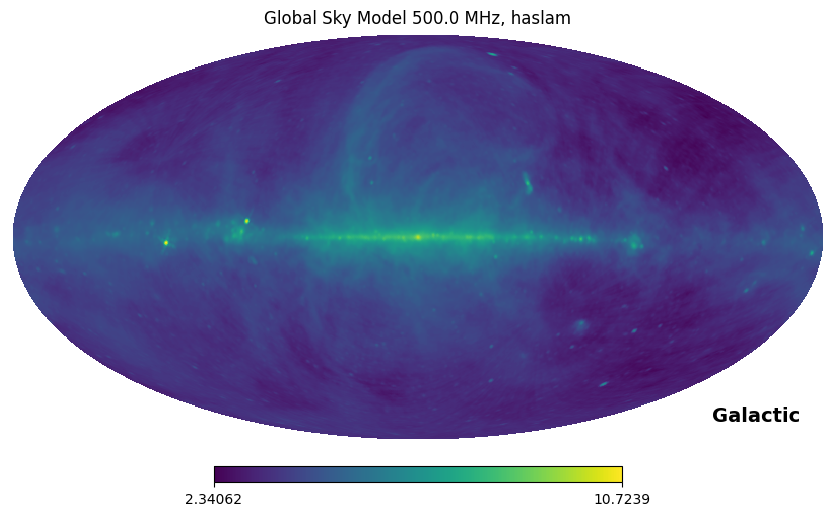

In [14]:
gsm = GlobalSkyModel()
gsm.generate(500)
gsm.view(logged=True)

UnboundLocalError: local variable 'plt' referenced before assignment

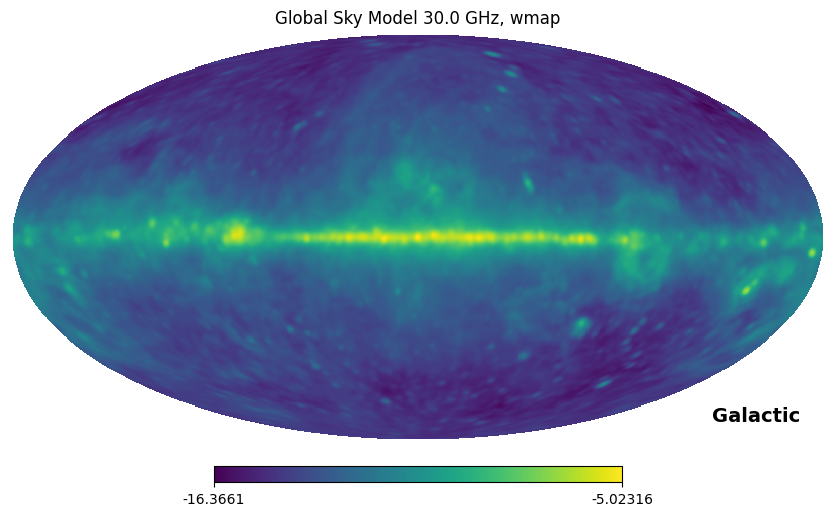

In [15]:
gsm = GlobalSkyModel(freq_unit='GHz', interpolation='pchip', basemap='wmap')
gsm.generate(30) # Generate at 30 GHz
gsm.view(logged=True)

UnboundLocalError: local variable 'plt' referenced before assignment

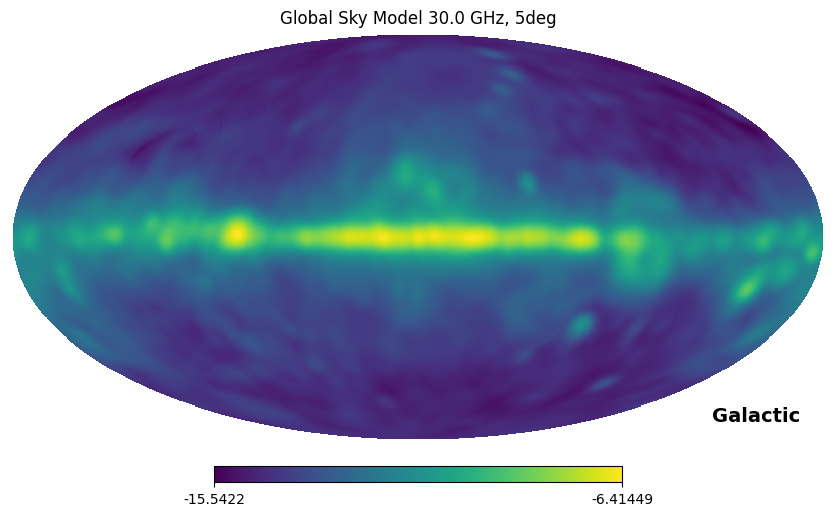

In [16]:
gsm.set_basemap('5deg')
gsm.view(logged=True)

UnboundLocalError: local variable 'plt' referenced before assignment

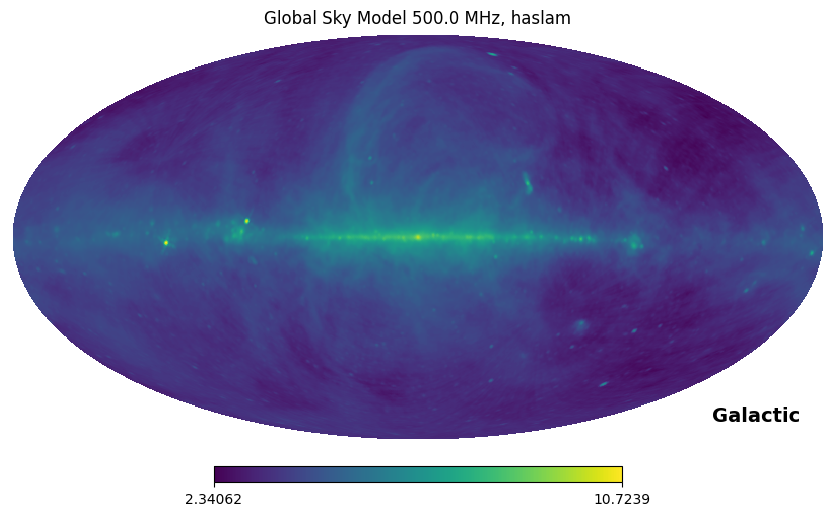

In [11]:
#gsm_2016 = GlobalSkyModel2016(freq_unit='MHz')
#gsm_2016.generate(500)
#gsm_2016.view(logged=True)

# Compare to 2008 De-Olivera Costa version
gsm_2008 = GlobalSkyModel(freq_unit='MHz')
gsm_2008.generate(500)
gsm_2008.view(logged=True)

We might then want to write this to a FITS file (in healpix format):

There are also a few options we can play around with. For example:

let's change to use a different interpolation method (pchip)
instead of using the Haslam 408 MHz map for structure, let's use WMAP 23 GHz
instead of using MHz to define the units, let's use GHz

In [ ]:
gsm = GlobalSkyModel2016(freq_unit='GHz', unit='MJysr', resolution='low')
gsm.generate(30) # Generate at 30 GHz
gsm.view(logged=False)

You can set things on the fly, too, once you've got a gsm object:

Just in case you're interested in spectral cubes, you can even pass a frequency range:

In [ ]:
gsm = GlobalSkyModel2016(freq_unit='GHz')
freqs = np.linspace(0.1, 4, 10)
map_cube = gsm.generate(freqs)

print map_cube.shape
plt.loglog(map_cube[:,100])  # Random pixel
plt.loglog(map_cube[:,12345]) # Another random pixel
plt.xlabel("Frequency [GHz]")
plt.ylabel("Temperature [K]")

Be careful with this one though, as it can eat up a lot of memory!

Generate observed sky for a given lat, long
A common task is to find out what the sky looks like at a given lat, long and date. PyGSM gives a quick method to do this:

In [23]:
from pygsm import GSMObserver
from datetime import datetime

# Setup observatory location - in this case, Auger, Argentina
(latitude, longitude, elevation) = ('-35.4667', '-69.3068', 1400)
ov = GSMObserver()
ov.lon = longitude
ov.lat = latitude
ov.elev = elevation
ov.date = datetime(2000, 8, 10, 23, 0)

And we can view galactic Mollweide projection too, with below-horizon data blanked out:

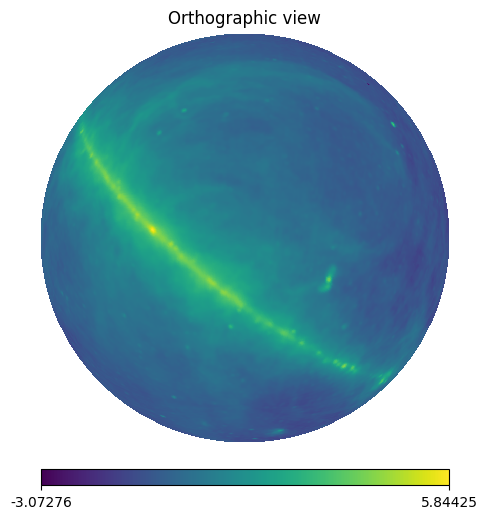

In [24]:
ov.generate(1400)
d = ov.view(logged=True)

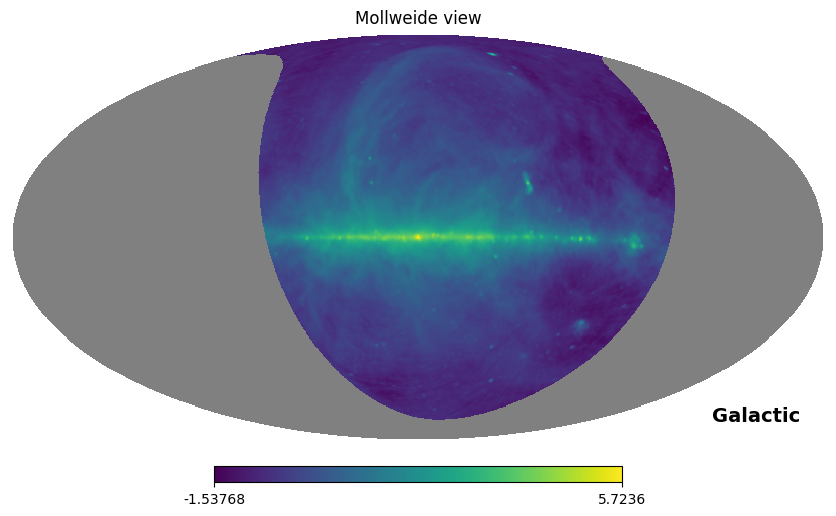

In [25]:
d = ov.view_observed_gsm(logged=True)